# **Разведочный анализ и предварительная обработка данных**

Набор данных на Kaggle: https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring/data

In [ ]:
# Базовые библиотеки для анализа данных

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Предобработка данных

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Разделение данных и кросс-валидация

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# Модели машинного обучения

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Вспомогательные инструменты для моделей

from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Метрики оценки качества модели

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Управление компонентами модели

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Методы балансировки классов

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Дополнительные библиотеки

from scipy import stats
from google.colab import files

In [ ]:
bank_file_content = files.upload()

Saving bank.csv to bank.csv


In [ ]:
# Загрузка данных

data = pd.read_csv('bank.csv', delimiter=";")

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


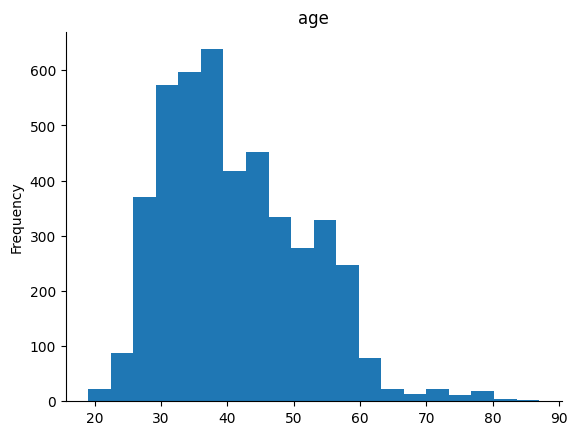

In [ ]:
# @title age

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

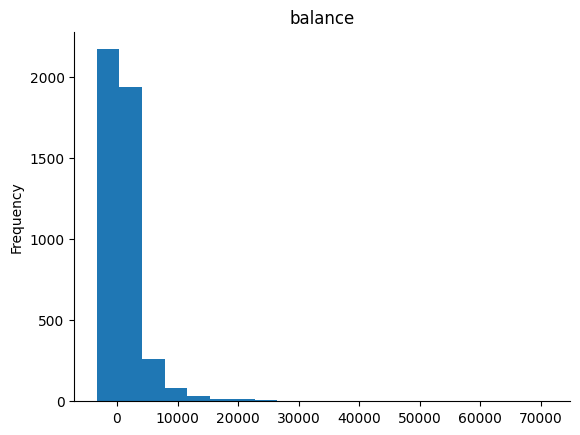

In [ ]:
# @title balance

from matplotlib import pyplot as plt
data['balance'].plot(kind='hist', bins=20, title='balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

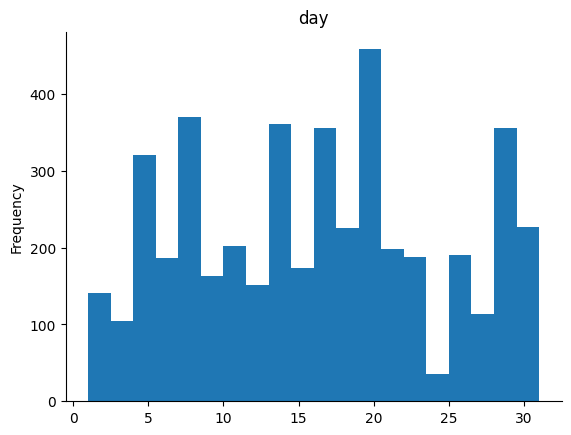

In [ ]:
# @title day

from matplotlib import pyplot as plt
data['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

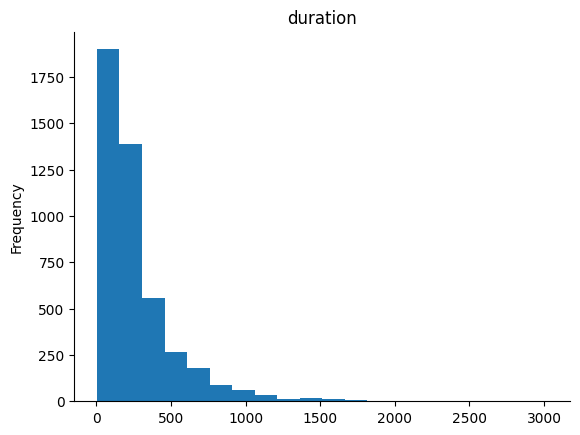

In [ ]:
# @title duration

from matplotlib import pyplot as plt
data['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

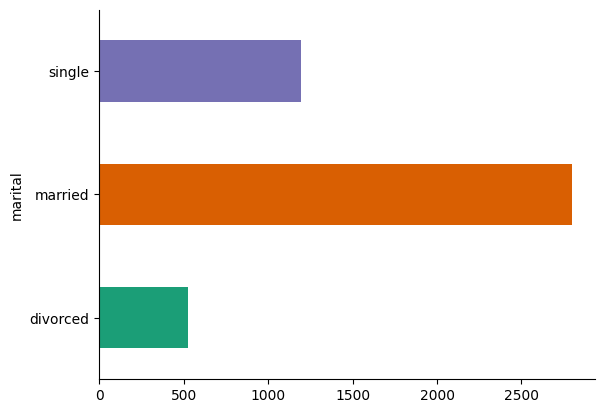

In [ ]:
# @title marital

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

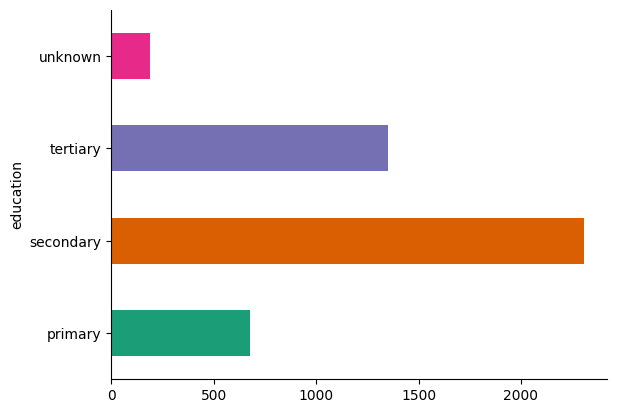

In [ ]:
# @title education

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

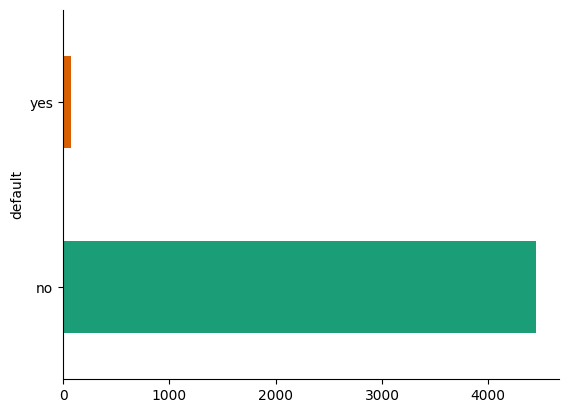

In [ ]:
# @title default

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('default').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

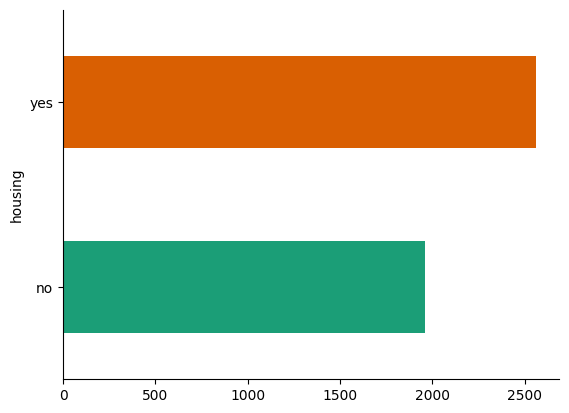

In [ ]:
# @title housing

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('housing').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

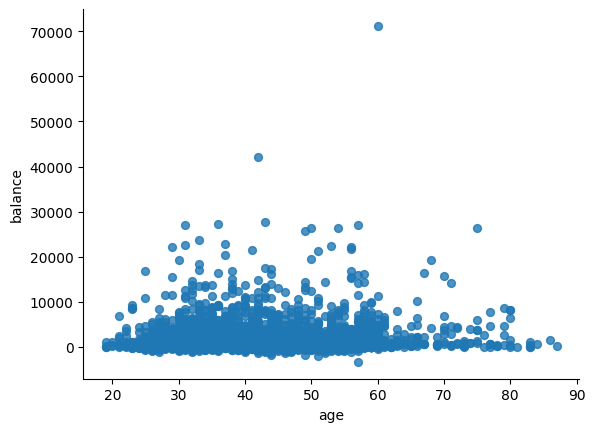

In [ ]:
# @title age vs balance

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

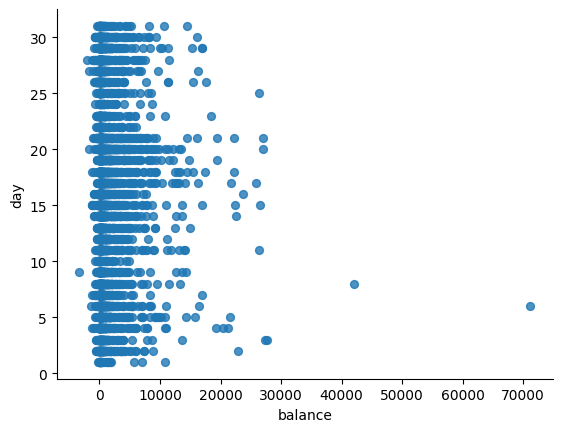

In [ ]:
# @title balance vs day

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='balance', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

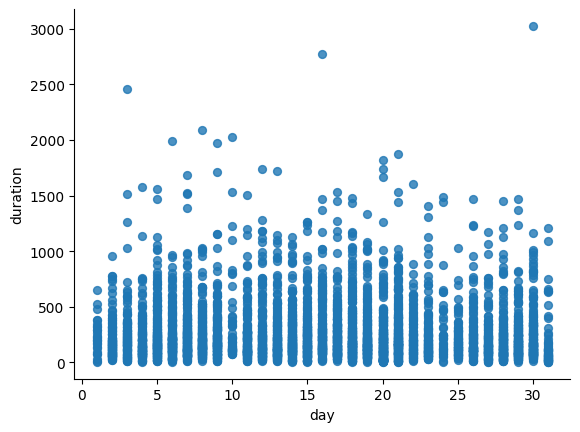

In [ ]:
# @title day vs duration

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='day', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

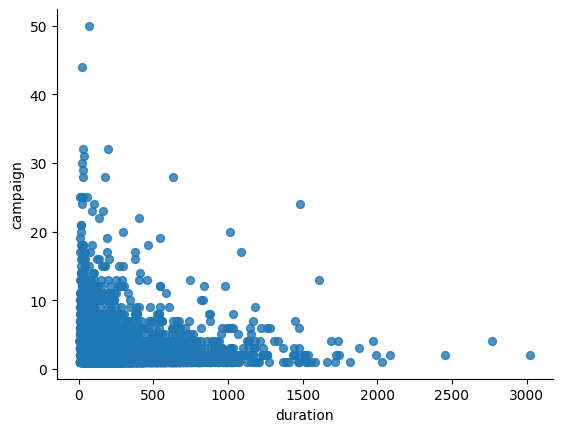

In [ ]:
# @title duration vs campaign

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='duration', y='campaign', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

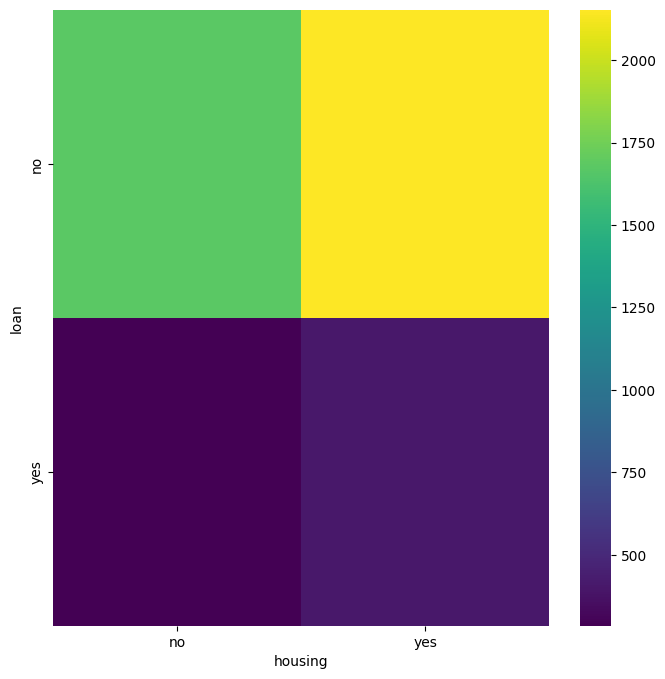

In [ ]:
# @title housing vs loan

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['loan'].value_counts()
    for x_label, grp in data.groupby('housing')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('housing')
_ = plt.ylabel('loan')

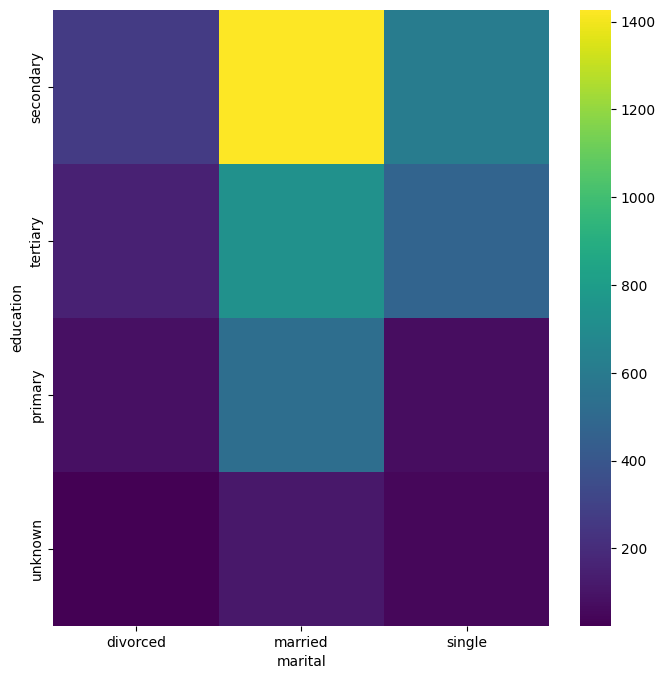

In [ ]:
# @title marital vs education

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education'].value_counts()
    for x_label, grp in data.groupby('marital')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital')
_ = plt.ylabel('education')

In [ ]:
# Проверка пропусков и их количество

data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# Проверка на дубликаты

data.duplicated().sum()

0

In [ ]:
# Статистические показатели целочисленных признаков

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
# Статистические показатели категориальных признаков

data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [ ]:
# Удаление строк с выбросами

selected_cols = ['balance', 'campaign', 'duration']

Q1 = data[selected_cols].quantile(0.25)
Q3 = data[selected_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

data = data[
    ~(
        (data[selected_cols] < lower_bound) |
        (data[selected_cols] > upper_bound)
    ).any(axis=1)
]

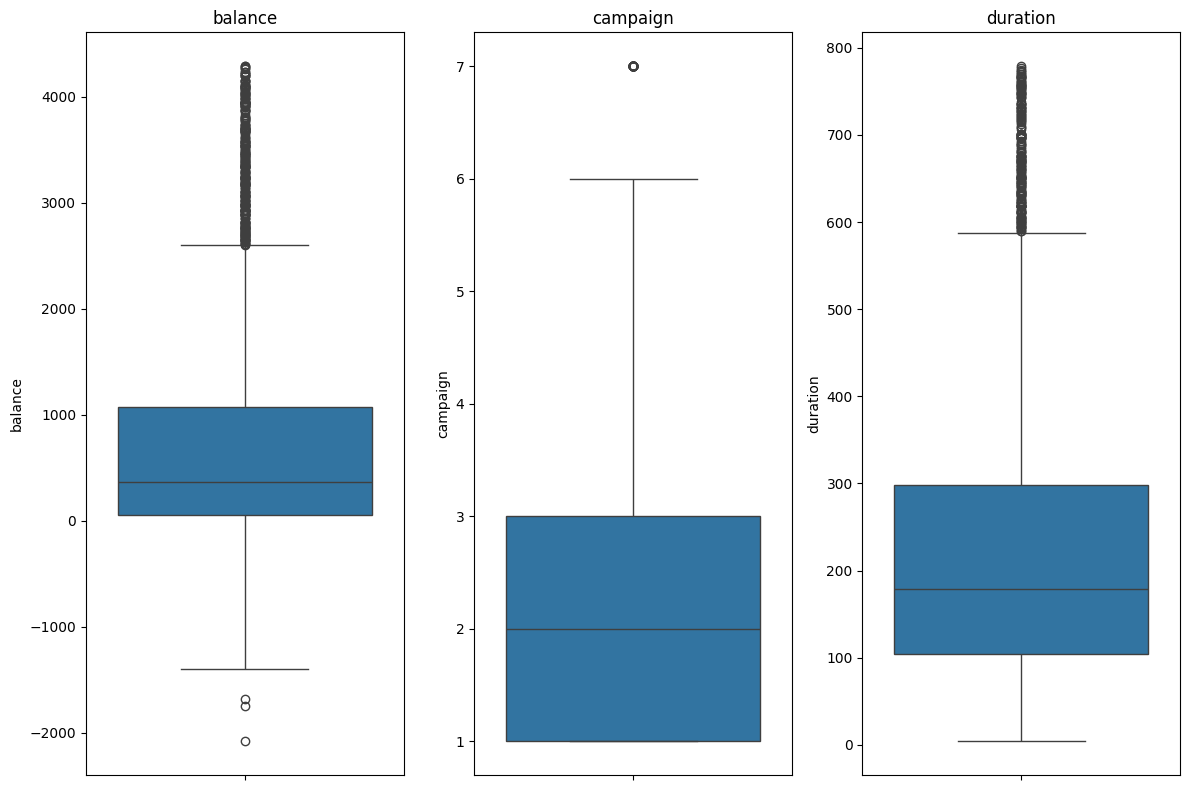

In [ ]:
# Визуализация после удаления выбросов

plt.figure(figsize=(12, 8))

for i, col in enumerate(selected_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=col, data=data)
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Удаление строк с пропущенными значениями

data = data.dropna()

In [ ]:
# Приравнивание количества строк со значениями
# 'no' и 'yes' для целевого признака

data = data.sample(frac=1).reset_index(drop=True)

count_no = (data['y'] == 'no').sum()
count_yes = (data['y'] == 'yes').sum()

min_count = min(count_no, count_yes)

data_no = data[data['y'] == 'no'].head(min_count)
data_yes = data[data['y'] == 'yes'].head(min_count)

data = pd.concat([data_no, data_yes])

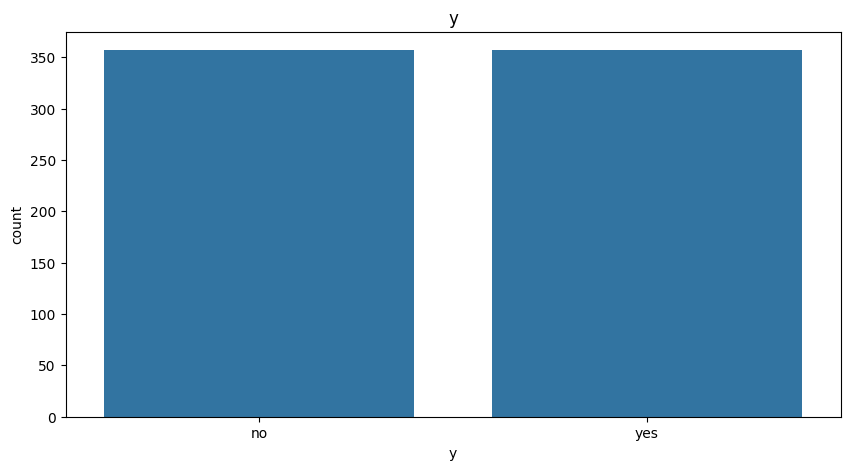

In [ ]:
# Визуализация после приравнивания

plt.figure(figsize=(10, 5))
plt.title('y')
sns.countplot(x='y', data=data)
plt.show()

In [ ]:
# Кодирование признаков

features_onehot = [
    'job',
    'marital',
    'contact',
    'poutcome',
    'default',
    'housing',
    'loan'
]

features_ordinal = [
    'education',
    'month'
]

target = 'y'

onehot_encoder = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

encoded_features_onehot = onehot_encoder.fit_transform(
    data[features_onehot]
)

feature_names_onehot = onehot_encoder.get_feature_names_out(
    features_onehot
)

encoded_df_onehot = pd.DataFrame(
    encoded_features_onehot,
    columns=feature_names_onehot,
    index=data.index
)

ordinal_encoder = OrdinalEncoder(
    categories=[
        ['primary', 'secondary', 'tertiary', 'unknown'],
        ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
         'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    ]
)

encoded_features_ordinal = ordinal_encoder.fit_transform(
    data[features_ordinal]
)

encoded_df_ordinal = pd.DataFrame(
    encoded_features_ordinal,
    columns=features_ordinal,
    index=data.index
)

encoded_target = label_encoder.fit_transform(data[target])
data[target] = encoded_target

data = pd.concat(
    [
        data.drop(features_onehot + features_ordinal, axis=1),
        encoded_df_onehot,
        encoded_df_ordinal
    ],
    axis=1
)

In [ ]:
# Переупорядочивание столбцов

columns_order = [
    col for col in data.columns
    if col != 'y'
] + ['y']

data = data[columns_order]

In [ ]:
# Масштабирование признаков

features_to_scale = data.columns.difference(['y'])
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(
    data[features_to_scale]
)

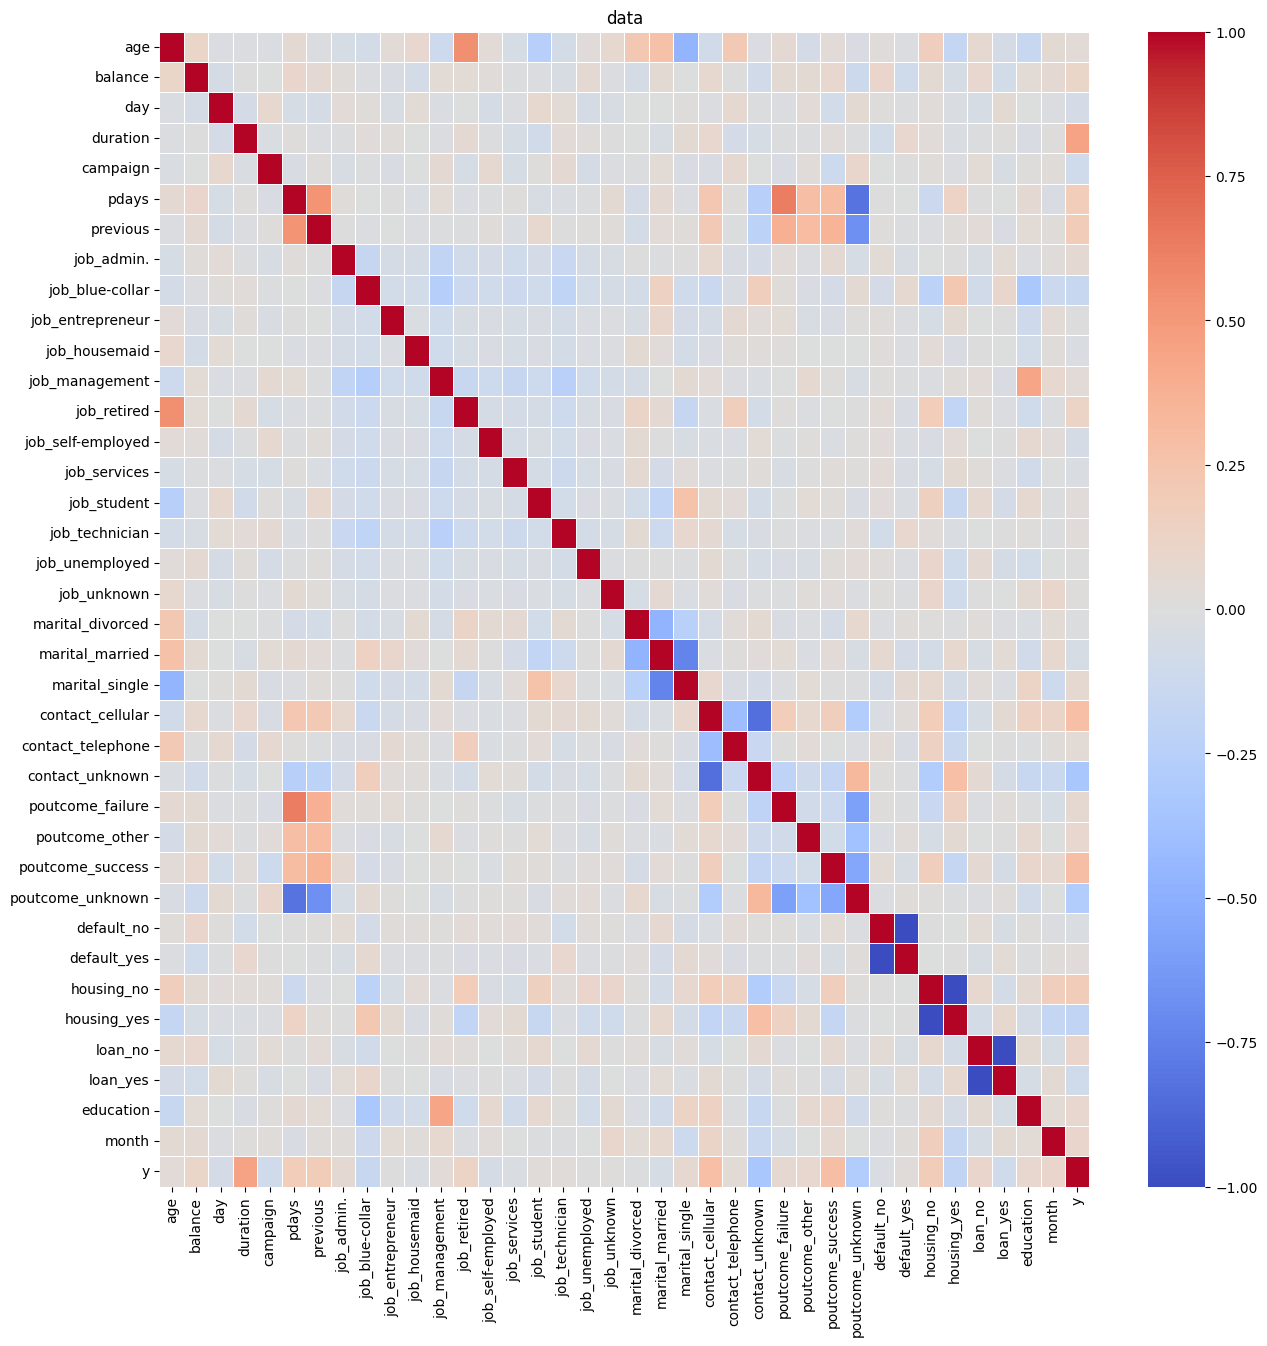

In [ ]:
# Построение тепловой карты

corr = data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    cmap='coolwarm',
    linewidths=.5
)
plt.title('data')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# **Применение алгоритмов машинного обучения и визуализация полученных результатов**

In [ ]:
def train_and_evaluate_model(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    param_grid=None
):
    if param_grid is not None:
        grid_search = GridSearchCV(
            model,
            param_grid,
            cv=5,
            scoring='accuracy'
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        print(f"Best parameters: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)

    y_pred_test = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("\nTest")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))

    print("\nTrain")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print("Classification Report:")
    print(classification_report(y_train, y_pred_train))
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_pred_train))

    train_sizes, train_scores, test_scores = learning_curve(
        best_model,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy',
        train_sizes = np.linspace(
            0.9,
            1.0,
            10
        )
    )
    plt.figure(figsize=(10, 6))
    plt.plot(
        train_sizes,
        np.mean(train_scores, axis=1),
        label='Training Accuracy'
    )
    plt.plot(
        train_sizes,
        np.mean(test_scores, axis=1),
        label='Validation Accuracy'
    )
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1),
    data['y'],
    test_size=0.2,
    random_state=42
)

Best parameters: {'C': 0.1, 'penalty': 'l1'}

Test
Accuracy: 0.7622377622377622
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        81
           1       0.70      0.79      0.74        62

    accuracy                           0.76       143
   macro avg       0.76      0.77      0.76       143
weighted avg       0.77      0.76      0.76       143

Confusion Matrix:
[[60 21]
 [13 49]]

Train
Accuracy: 0.819614711033275
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       276
           1       0.83      0.82      0.82       295

    accuracy                           0.82       571
   macro avg       0.82      0.82      0.82       571
weighted avg       0.82      0.82      0.82       571

Confusion Matrix:
[[226  50]
 [ 53 242]]


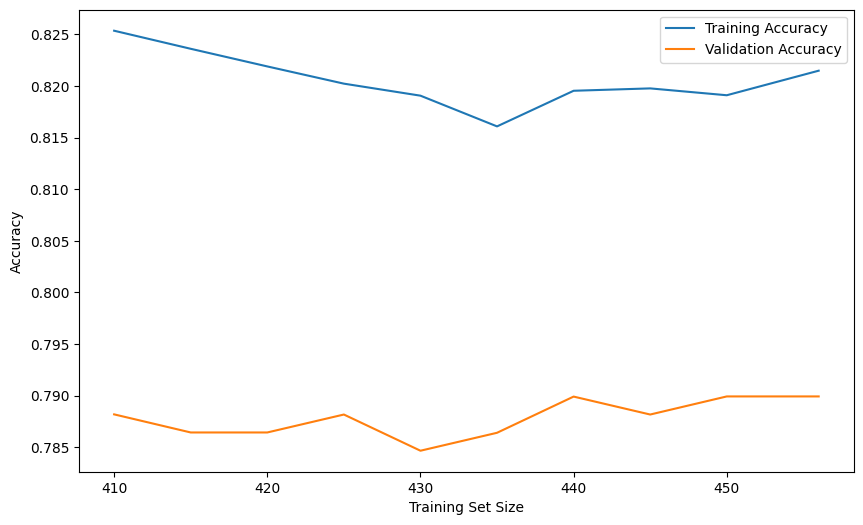

In [ ]:
# Логистическая регрессия

logreg_model = LogisticRegression(
    random_state=42,
    solver='saga',
    max_iter=10000
)
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'penalty': ['l1', 'l2']
}

train_and_evaluate_model(
    logreg_model,
    X_train,
    y_train,
    X_test,
    y_test,
    param_grid=param_grid_logreg
)

Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

Test
Accuracy: 0.7202797202797203
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.65      0.73        81
           1       0.64      0.81      0.71        62

    accuracy                           0.72       143
   macro avg       0.73      0.73      0.72       143
weighted avg       0.74      0.72      0.72       143

Confusion Matrix:
[[53 28]
 [12 50]]

Train
Accuracy: 0.840630472854641
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       276
           1       0.84      0.85      0.85       295

    accuracy                           0.84       571
   macro avg       0.84      0.84      0.84       571
weighted avg       0.84      0.84      0.84       571

Confusion Matrix:
[[228  48]
 [ 43 252]]


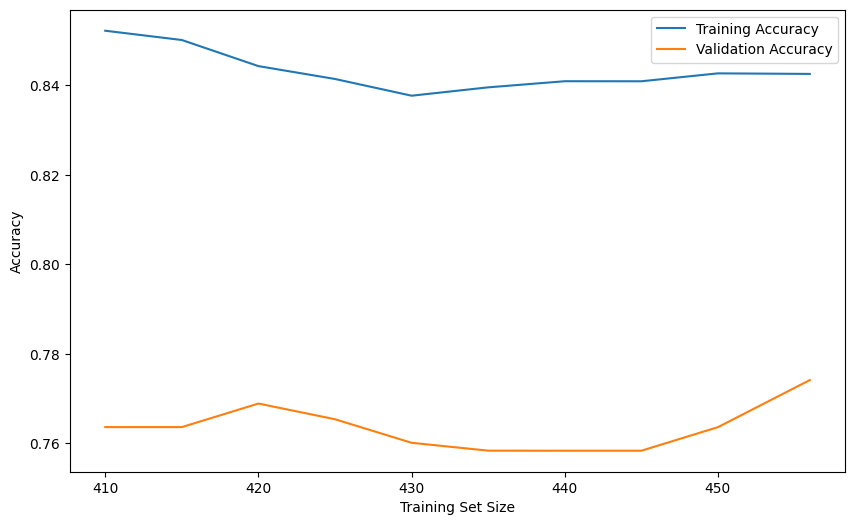

In [ ]:
# SVM

svm_model = SVC(probability=True, random_state=42)
param_grid_svm = {
    'C': [0.5, 1, 5, 10, 50],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
    'kernel': ['rbf', 'linear'],
}

train_and_evaluate_model(
    svm_model,
    X_train,
    y_train,
    X_test,
    y_test,
    param_grid=param_grid_svm
)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}

Test
Accuracy: 0.6993006993006993
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        81
           1       0.64      0.71      0.67        62

    accuracy                           0.70       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.71      0.70      0.70       143

Confusion Matrix:
[[56 25]
 [18 44]]

Train
Accuracy: 0.7618213660245184
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       276
           1       0.78      0.75      0.77       295

    accuracy                           0.76       571
   macro avg       0.76      0.76      0.76       571
weighted avg       0.76      0.76      0.76       571

Confusion Matrix:
[[213  63]
 [ 73 222]]


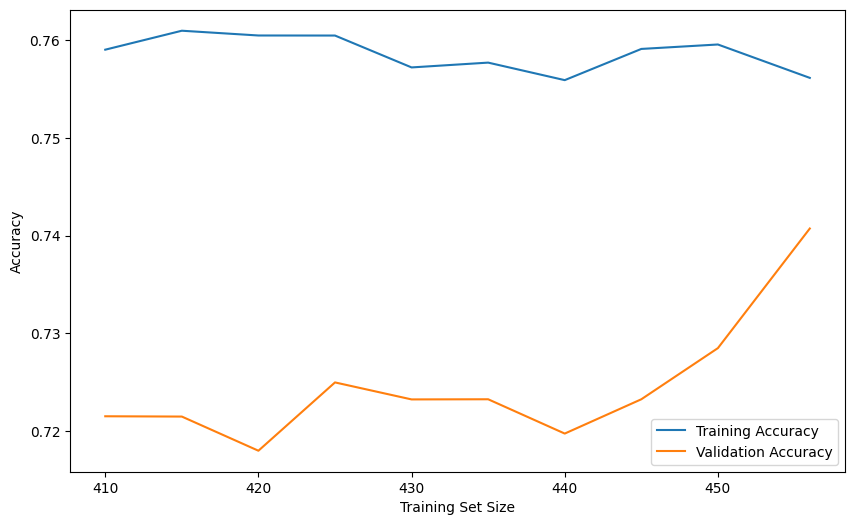

In [ ]:
# K-ближайших соседей

knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [
        3, 5, 7, 9, 11,
        13, 15, 17, 19,
        21, 23, 25
    ],
    'weights': [
        'uniform',
        'distance'
    ],
    'metric': [
        'euclidean',
        'manhattan',
        'minkowski'
    ]
}

train_and_evaluate_model(
    knn_model,
    X_train,
    y_train,
    X_test,
    y_test,
    param_grid=param_grid_knn
)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 750}

Test
Accuracy: 0.7552447552447552
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77        81
           1       0.68      0.82      0.74        62

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.75       143
weighted avg       0.77      0.76      0.76       143

Confusion Matrix:
[[57 24]
 [11 51]]

Train
Accuracy: 0.8949211908931699
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       276
           1       0.87      0.93      0.90       295

    accuracy                           0.89       571
   macro avg       0.90      0.89      0.89       571
weighted avg       0.90      0.89      0.89       571

Confusion Matrix:
[[236  40]
 [ 20 275]]


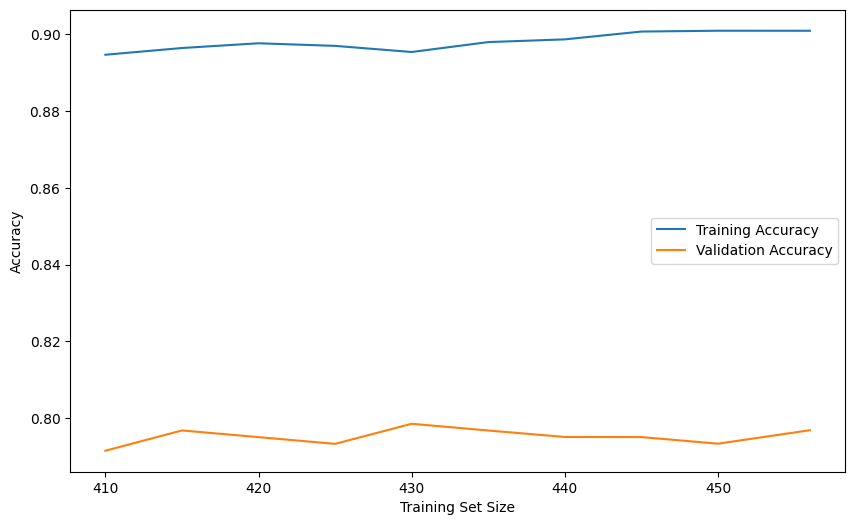

In [ ]:
# Случайный лес

rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [500, 750],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [4, 6]
}

train_and_evaluate_model(
    rf_model,
    X_train,
    y_train,
    X_test,
    y_test,
    param_grid=param_grid_rf
)

Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}

Test
Accuracy: 0.8041958041958042
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        81
           1       0.72      0.89      0.80        62

    accuracy                           0.80       143
   macro avg       0.81      0.81      0.80       143
weighted avg       0.82      0.80      0.80       143

Confusion Matrix:
[[60 21]
 [ 7 55]]

Train
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       295

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571

Confusion Matrix:
[[276   0]
 [  0 295]]


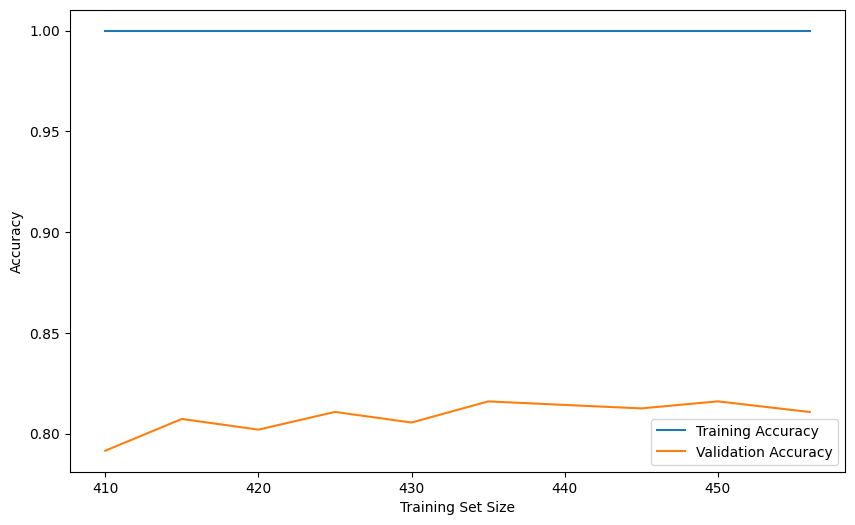

In [ ]:
# Градиентный бустинг

gb_model = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10]
}

train_and_evaluate_model(
    gb_model,
    X_train,
    y_train,
    X_test,
    y_test,
    param_grid=param_grid_gb
)


Test
Accuracy: 0.7552447552447552
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        81
           1       0.69      0.79      0.74        62

    accuracy                           0.76       143
   macro avg       0.75      0.76      0.75       143
weighted avg       0.76      0.76      0.76       143

Confusion Matrix:
[[59 22]
 [13 49]]

Train
Accuracy: 0.9667250437828371
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       276
           1       0.96      0.97      0.97       295

    accuracy                           0.97       571
   macro avg       0.97      0.97      0.97       571
weighted avg       0.97      0.97      0.97       571

Confusion Matrix:
[[265  11]
 [  8 287]]


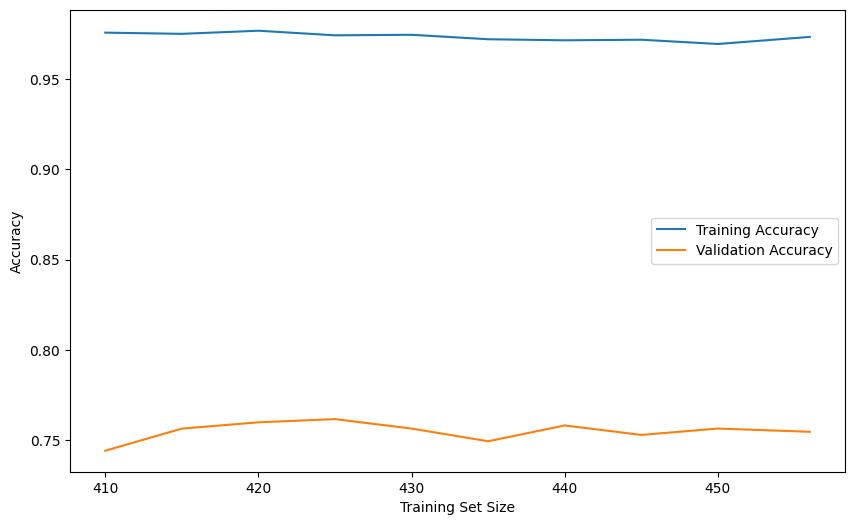

In [ ]:
# Ансамбль

ensemble_model = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('random_forest', rf_model)
], voting='soft')

train_and_evaluate_model(
    ensemble_model,
    X_train,
    y_train,
    X_test,
    y_test
)